In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_taxonomic_level(df, level_prefix, level_name, top_n=10):
   groups = {
       'Control': df[df['isolate'].str.contains('Control')],
       'OSCC': df[df['isolate'].str.contains('cancer')],
       'Tobacco': df[df['isolate'].str.contains('Tobacco')]
   }
   
   abundances = {}
   for group_name, group_data in groups.items():
       taxa_cols = [col for col in group_data.columns if level_prefix in col]
       mean_abundances = group_data[taxa_cols].mean()
       rel_abundance = (mean_abundances / mean_abundances.sum()) * 100
       abundances[group_name] = rel_abundance.nlargest(top_n)
   
   fig, ax = plt.subplots(figsize=(12, 6))
   bottom = np.zeros(3)
   
   for taxon in abundances['Control'].index:
       values = [abundances[group][taxon] if taxon in abundances[group].index else 0 
                for group in ['Control', 'OSCC', 'Tobacco']]
       label = taxon.split(level_prefix)[-1]
       ax.barh(['Control', 'OSCC', 'Tobacco'], values, left=bottom, label=label)
       bottom += values
   
   plt.xlabel('Relative Abundance (%)')
   plt.title(f'Relative Abundance of {level_name}')
   plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
   plt.tight_layout()
   plt.savefig(f'{level_name}_abundance.tiff', dpi=300, bbox_inches='tight')
   plt.close()

# Read data
df = pd.read_csv('level-6.csv')

# Plot different taxonomic levels
taxonomic_levels = [
   ('p__', 'Bacterial Phyla'),
   ('c__', 'Bacterial Classes'), 
   ('o__', 'Bacterial Orders'),
   ('f__', 'Bacterial Families'),
   ('g__', 'Bacterial Genera')
]

# Plot and save graphs
for prefix, name in taxonomic_levels:
   plot_taxonomic_level(df, prefix, name)

# Print abundances function
def print_abundances(df, level_prefix):
   groups = {
       'Control': df[df['isolate'].str.contains('Control')],
       'OSCC': df[df['isolate'].str.contains('cancer')],
       'Tobacco': df[df['isolate'].str.contains('Tobacco')]
   }
   
   print(f"\nTop {level_prefix.split('__')[0]} abundances:")
   for group_name, group_data in groups.items():
       taxa_cols = [col for col in group_data.columns if level_prefix in col]
       mean_abundances = group_data[taxa_cols].mean()
       rel_abundance = (mean_abundances / mean_abundances.sum()) * 100
       top_5 = rel_abundance.nlargest(5)
       
       print(f"\n{group_name}:")
       for taxon, abundance in top_5.items():
           print(f"{taxon.split(level_prefix)[-1]}: {abundance:.1f}%")

# Print abundances for each level
for prefix, name in taxonomic_levels:
   print_abundances(df, prefix)


Top p abundances:

Control:
Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus: 14.8%
Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces: 8.5%
Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas: 7.6%
Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Neisseriaceae;g__Neisseria: 6.3%
Actinobacteriota;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Rothia: 5.9%

OSCC:
Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Megasphaera: 13.1%
Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus: 12.7%
Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;f__Peptostreptococcales-Tissierellales;g__Parvimonas: 7.4%
Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella: 7.0%
Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium: 6.1%

Tobacco:
Firmicutes;c__Bac

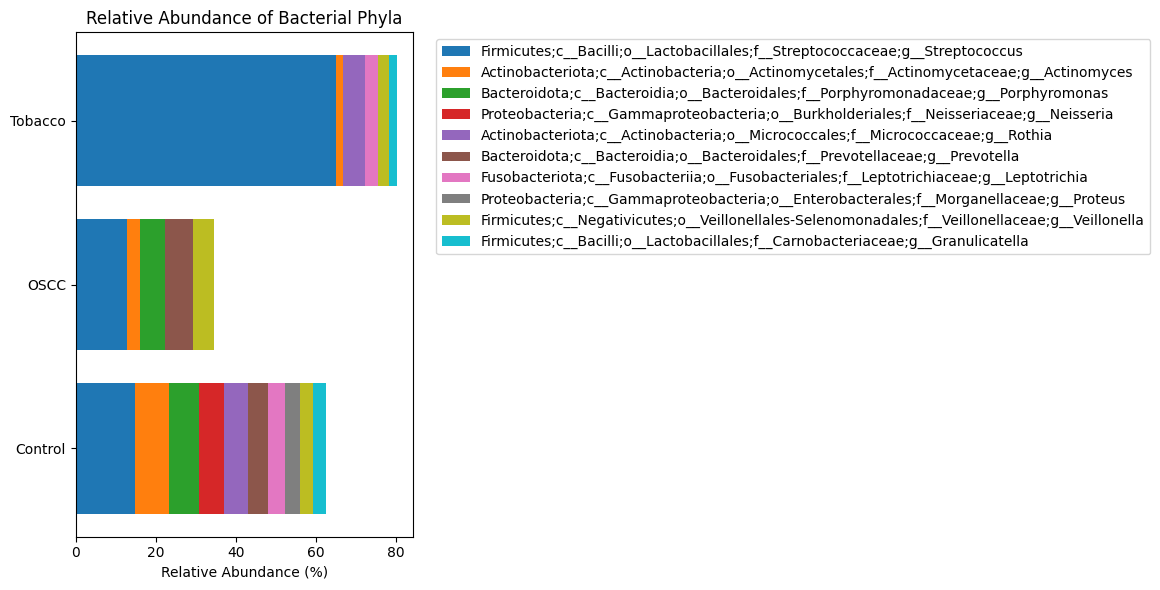

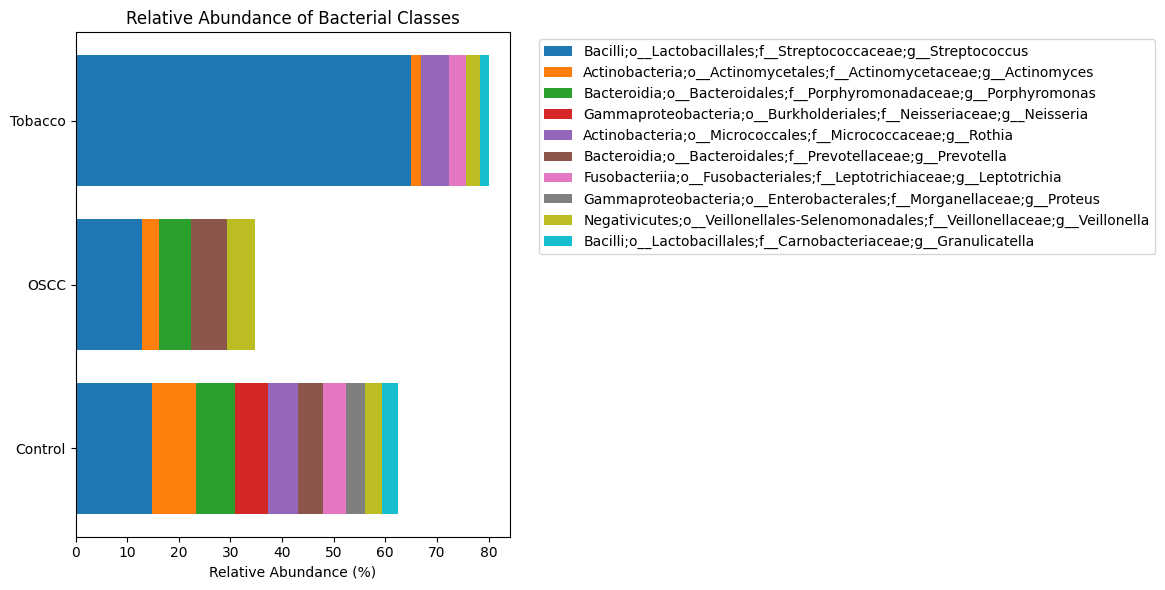

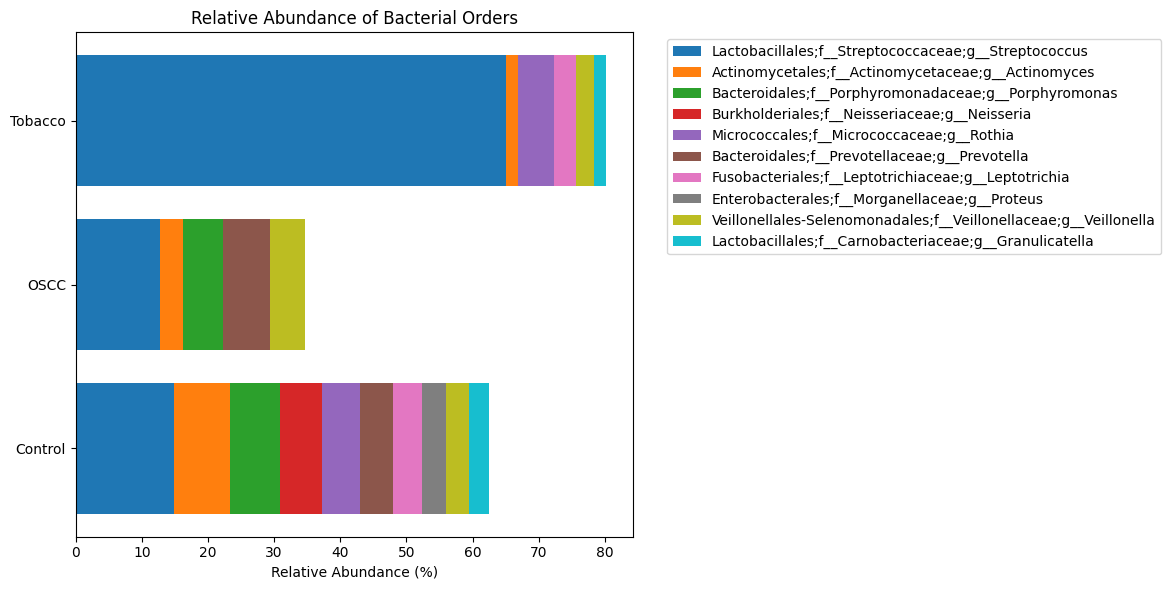

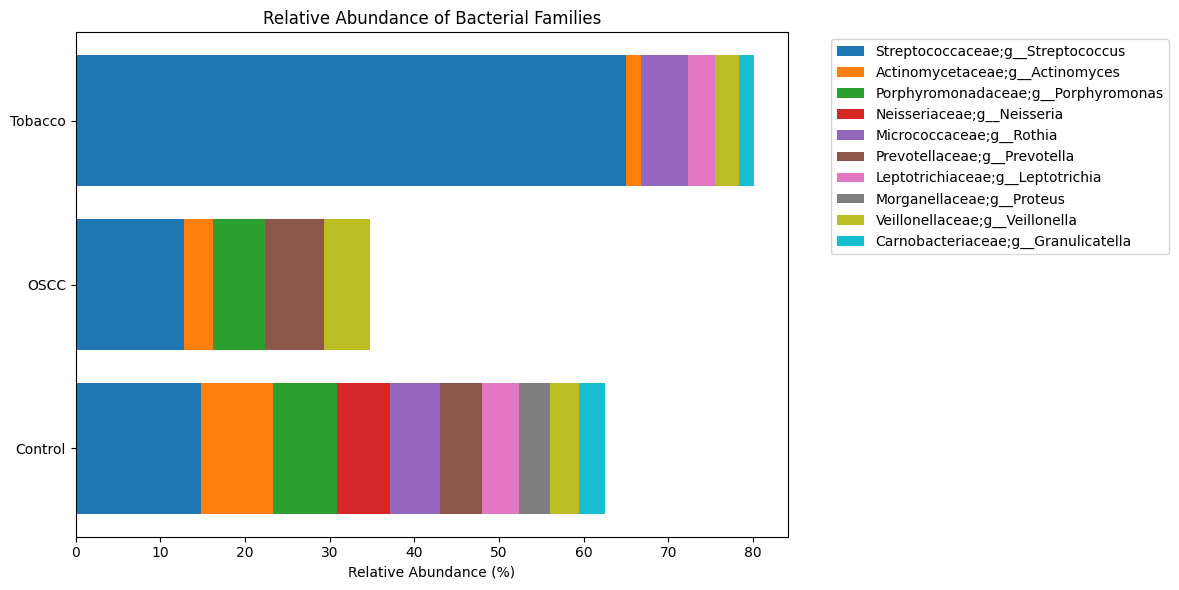

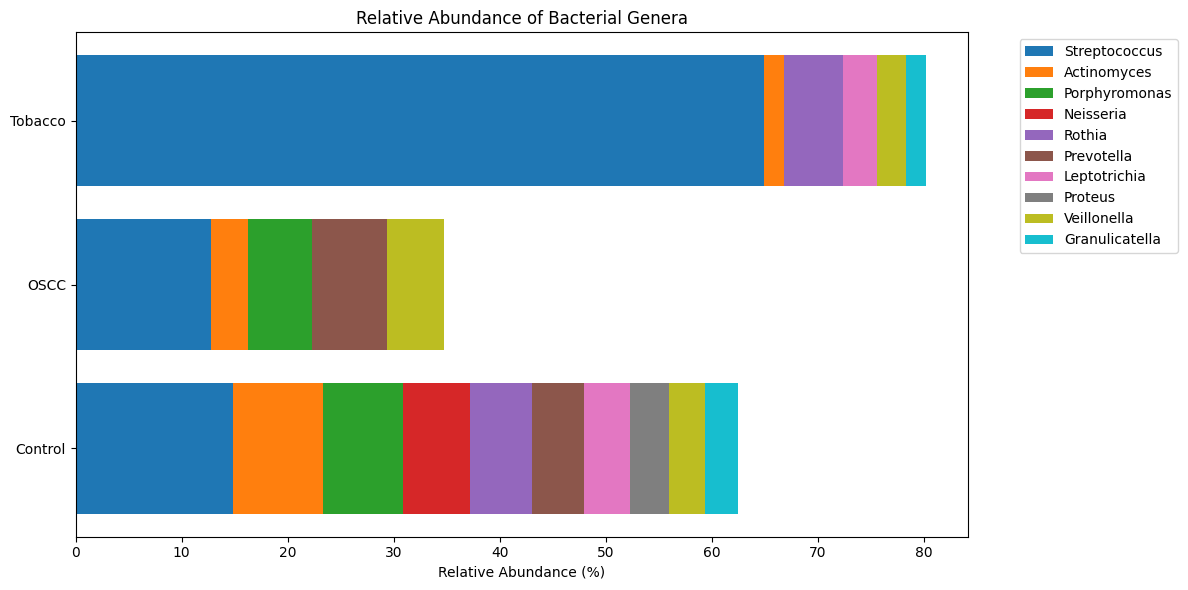


Top p abundances:

Control:
Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus: 14.8%
Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces: 8.5%
Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas: 7.6%
Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Neisseriaceae;g__Neisseria: 6.3%
Actinobacteriota;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Rothia: 5.9%

OSCC:
Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Megasphaera: 13.1%
Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus: 12.7%
Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;f__Peptostreptococcales-Tissierellales;g__Parvimonas: 7.4%
Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella: 7.0%
Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium: 6.1%

Tobacco:
Firmicutes;c__Bac

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_taxonomic_level(df, level_prefix, level_name, top_n=10):
   groups = {
       'Control': df[df['isolate'].str.contains('Control')],
       'OSCC': df[df['isolate'].str.contains('cancer')],
       'Tobacco': df[df['isolate'].str.contains('Tobacco')]
   }
   
   abundances = {}
   for group_name, group_data in groups.items():
       taxa_cols = [col for col in group_data.columns if level_prefix in col]
       mean_abundances = group_data[taxa_cols].mean()
       rel_abundance = (mean_abundances / mean_abundances.sum()) * 100
       abundances[group_name] = rel_abundance.nlargest(top_n)
   
   fig, ax = plt.subplots(figsize=(12, 6))
   bottom = np.zeros(3)
   
   for taxon in abundances['Control'].index:
       values = [abundances[group][taxon] if taxon in abundances[group].index else 0 
                for group in ['Control', 'OSCC', 'Tobacco']]
       label = taxon.split(level_prefix)[1]
       ax.barh(['Control', 'OSCC', 'Tobacco'], values, left=bottom, label=label)
       bottom += values
   
   plt.xlabel('Relative Abundance (%)')
   plt.title(f'Relative Abundance of {level_name}')
   plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
   plt.tight_layout()
   plt.show()

# Read data
df = pd.read_csv('level-6.csv')

# Plot different taxonomic levels
taxonomic_levels = [
   ('p__', 'Bacterial Phyla'),
   ('c__', 'Bacterial Classes'), 
   ('o__', 'Bacterial Orders'),
   ('f__', 'Bacterial Families'),
   ('g__', 'Bacterial Genera')
]

for prefix, name in taxonomic_levels:
   plot_taxonomic_level(df, prefix, name)

# Print top abundances for each level
def print_abundances(df, level_prefix):
   groups = {
       'Control': df[df['isolate'].str.contains('Control')],
       'OSCC': df[df['isolate'].str.contains('cancer')],
       'Tobacco': df[df['isolate'].str.contains('Tobacco')]
   }
   
   print(f"\nTop {level_prefix.split('__')[0]} abundances:")
   for group_name, group_data in groups.items():
       taxa_cols = [col for col in group_data.columns if level_prefix in col]
       mean_abundances = group_data[taxa_cols].mean()
       rel_abundance = (mean_abundances / mean_abundances.sum()) * 100
       top_5 = rel_abundance.nlargest(5)
       
       print(f"\n{group_name}:")
       for taxon, abundance in top_5.items():
           print(f"{taxon.split(level_prefix)[1]}: {abundance:.1f}%")

for prefix, _ in taxonomic_levels:
   print_abundances(df, prefix)

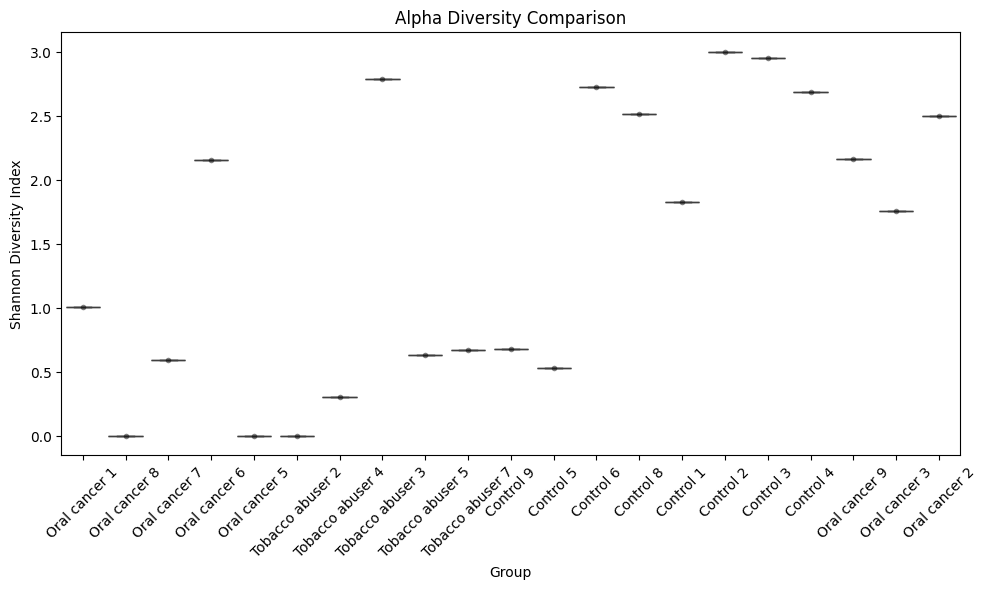


Statistical Summary:
                  count      mean  std       min       25%       50%  \
isolate                                                                
Control 1           1.0  1.833128  NaN  1.833128  1.833128  1.833128   
Control 2           1.0  3.007305  NaN  3.007305  3.007305  3.007305   
Control 3           1.0  2.955846  NaN  2.955846  2.955846  2.955846   
Control 4           1.0  2.687725  NaN  2.687725  2.687725  2.687725   
Control 5           1.0  0.529706  NaN  0.529706  0.529706  0.529706   
Control 6           1.0  2.728530  NaN  2.728530  2.728530  2.728530   
Control 8           1.0  2.520691  NaN  2.520691  2.520691  2.520691   
Control 9           1.0  0.682908  NaN  0.682908  0.682908  0.682908   
Oral cancer 1       1.0  1.012567  NaN  1.012567  1.012567  1.012567   
Oral cancer 2       1.0  2.504636  NaN  2.504636  2.504636  2.504636   
Oral cancer 3       1.0  1.758685  NaN  1.758685  1.758685  1.758685   
Oral cancer 5       1.0  0.000000  NaN -0.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read data
df = pd.read_csv('level-6.csv')

# Calculate alpha diversity (Shannon index) for each sample
def shannon_diversity(row):
    abundances = [x for x in row if x > 0]  # Remove zero abundances
    if not abundances:
        return 0
    total = sum(abundances)
    proportions = [x/total for x in abundances]
    return -sum(p * np.log(p) for p in proportions)

# Get bacterial columns
bacteria_cols = [col for col in df.columns if 'g__' in col]

# Calculate diversity for each sample
df['shannon_diversity'] = df[bacteria_cols].apply(shannon_diversity, axis=1)

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='isolate', y='shannon_diversity', data=df)
sns.swarmplot(x='isolate', y='shannon_diversity', data=df, color='black', size=4, alpha=0.5)

plt.title('Alpha Diversity Comparison')
plt.xlabel('Group')
plt.ylabel('Shannon Diversity Index')
plt.xticks(rotation=45)

# Perform Kruskal-Wallis test
groups = [group['shannon_diversity'].values for name, group in df.groupby('isolate')]
h_stat, p_val = stats.kruskal(*groups)



plt.tight_layout()
plt.show()

# Print statistical summary
print("\nStatistical Summary:")
print(df.groupby('isolate')['shannon_diversity'].describe())

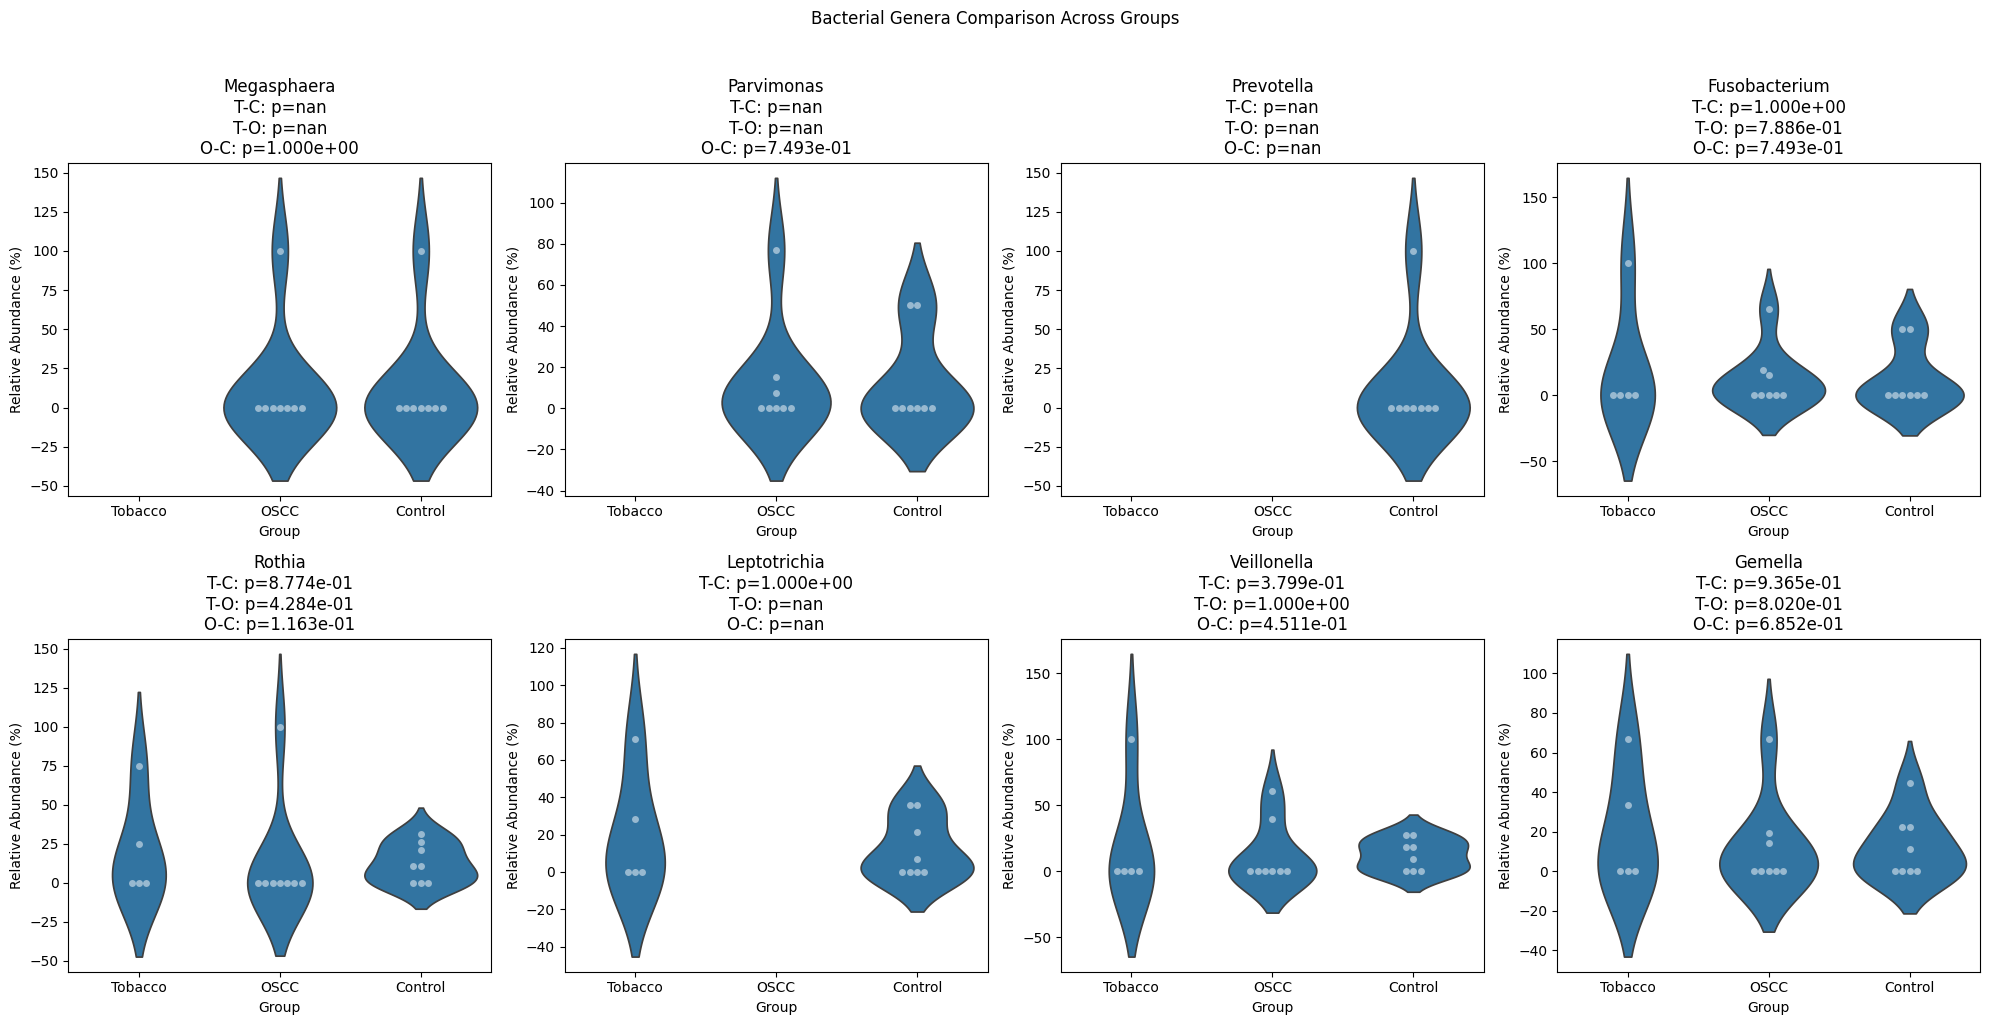

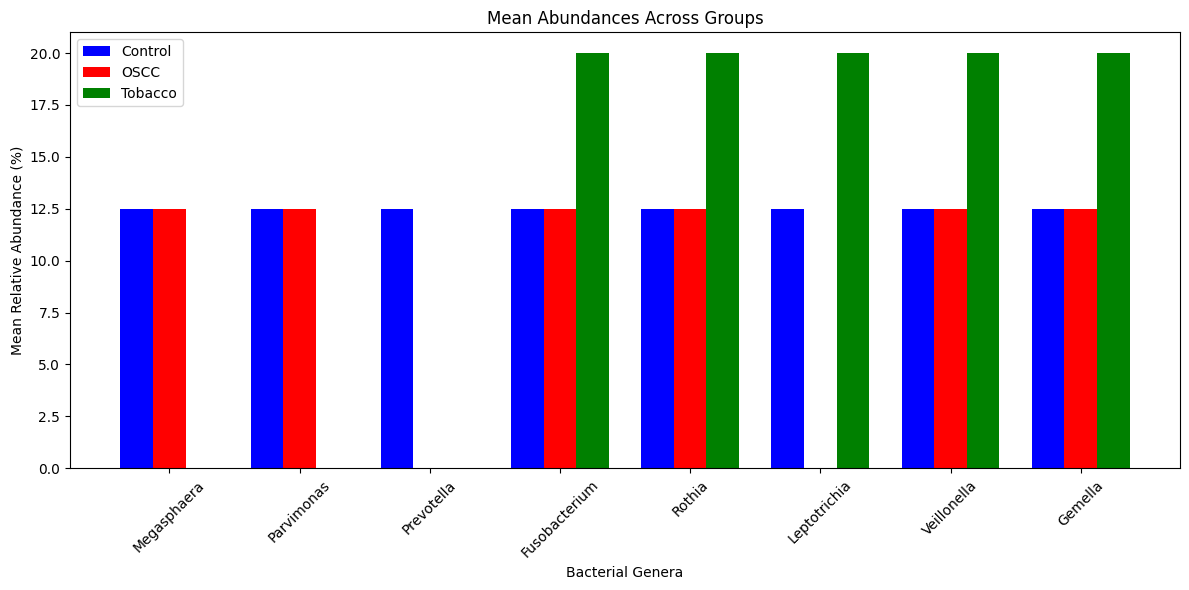


Detailed Statistical Analysis:

Megasphaera:
Mean abundances:
  Control: 12.5%
  OSCC: 12.5%
  Tobacco: nan%
P-values:
  Tobacco vs Control: nan
  Tobacco vs OSCC: nan
  OSCC vs Control: 1.000e+00

Parvimonas:
Mean abundances:
  Control: 12.5%
  OSCC: 12.5%
  Tobacco: nan%
P-values:
  Tobacco vs Control: nan
  Tobacco vs OSCC: nan
  OSCC vs Control: 7.493e-01

Prevotella:
Mean abundances:
  Control: 12.5%
  OSCC: nan%
  Tobacco: nan%
P-values:
  Tobacco vs Control: nan
  Tobacco vs OSCC: nan
  OSCC vs Control: nan

Fusobacterium:
Mean abundances:
  Control: 12.5%
  OSCC: 12.5%
  Tobacco: 20.0%
P-values:
  Tobacco vs Control: 1.000e+00
  Tobacco vs OSCC: 7.886e-01
  OSCC vs Control: 7.493e-01

Rothia:
Mean abundances:
  Control: 12.5%
  OSCC: 12.5%
  Tobacco: 20.0%
P-values:
  Tobacco vs Control: 8.774e-01
  Tobacco vs OSCC: 4.284e-01
  OSCC vs Control: 1.163e-01

Leptotrichia:
Mean abundances:
  Control: 12.5%
  OSCC: nan%
  Tobacco: 20.0%
P-values:
  Tobacco vs Control: 1.000e+00
  T

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os

# Create directory for plots
plot_dir = 'microbiome_analysis_plots'
if not os.path.exists(plot_dir):
   os.makedirs(plot_dir)

def analyze_all_groups(df, genera_list):
   tobacco = df[df['isolate'].str.contains('Tobacco')]
   oscc = df[df['isolate'].str.contains('cancer')]
   control = df[df['isolate'].str.contains('Control')]
   
   results = []
   fig, axes = plt.subplots(2, 4, figsize=(20, 10))
   axes = axes.flatten()
   
   for idx, genus in enumerate(genera_list):
       genus_col = [col for col in df.columns if genus in col][0]
       
       # Calculate values
       tobacco_vals = tobacco[genus_col] / tobacco[genus_col].sum() * 100
       oscc_vals = oscc[genus_col] / oscc[genus_col].sum() * 100
       control_vals = control[genus_col] / control[genus_col].sum() * 100
       
       # Mann-Whitney U tests
       stat_tc, pval_tc = stats.mannwhitneyu(tobacco_vals, control_vals, alternative='two-sided')
       stat_to, pval_to = stats.mannwhitneyu(tobacco_vals, oscc_vals, alternative='two-sided')
       stat_oc, pval_oc = stats.mannwhitneyu(oscc_vals, control_vals, alternative='two-sided')
       
       results.append({
           'Genus': genus,
           'Mean_Tobacco': tobacco_vals.mean(),
           'Mean_OSCC': oscc_vals.mean(),
           'Mean_Control': control_vals.mean(),
           'P_value_Tobacco_Control': pval_tc,
           'P_value_Tobacco_OSCC': pval_to,
           'P_value_OSCC_Control': pval_oc
       })
       
       # Violin plot
       ax = axes[idx]
       data = pd.DataFrame({
           'Group': ['Tobacco']*len(tobacco_vals) + ['OSCC']*len(oscc_vals) + ['Control']*len(control_vals),
           'Abundance': list(tobacco_vals) + list(oscc_vals) + list(control_vals)
       })
       
       sns.violinplot(data=data, x='Group', y='Abundance', ax=ax, inner=None)
       sns.swarmplot(data=data, x='Group', y='Abundance', ax=ax, color='white', alpha=0.5)
       
       ax.set_title(f'{genus}\nT-C: p={pval_tc:.3e}\nT-O: p={pval_to:.3e}\nO-C: p={pval_oc:.3e}')
       ax.set_ylabel('Relative Abundance (%)')
       
   plt.suptitle('Bacterial Genera Comparison Across Groups', y=1.02)
   plt.tight_layout()
   plt.savefig(os.path.join(plot_dir, 'violin_plots.png'), dpi=300, bbox_inches='tight')
   plt.show()
   
   return pd.DataFrame(results)

# Analysis
df = pd.read_csv('level-6.csv')
genera = ['Megasphaera', 'Parvimonas', 'Prevotella', 'Fusobacterium', 
         'Rothia', 'Leptotrichia', 'Veillonella', 'Gemella']
results = analyze_all_groups(df, genera)

# Bar plot
plt.figure(figsize=(12, 6))
x = np.arange(len(genera))
width = 0.25

plt.bar(x - width, results['Mean_Control'], width, label='Control', color='blue')
plt.bar(x, results['Mean_OSCC'], width, label='OSCC', color='red')
plt.bar(x + width, results['Mean_Tobacco'], width, label='Tobacco', color='green')

plt.xlabel('Bacterial Genera')
plt.ylabel('Mean Relative Abundance (%)')
plt.title('Mean Abundances Across Groups')
plt.xticks(x, genera, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'mean_abundances.png'), dpi=300, bbox_inches='tight')
plt.show()

# Summary output
print("\nDetailed Statistical Analysis:")
for _, row in results.iterrows():
   print(f"\n{row['Genus']}:")
   print(f"Mean abundances:")
   print(f"  Control: {row['Mean_Control']:.1f}%")
   print(f"  OSCC: {row['Mean_OSCC']:.1f}%")
   print(f"  Tobacco: {row['Mean_Tobacco']:.1f}%")
   print(f"P-values:")
   print(f"  Tobacco vs Control: {row['P_value_Tobacco_Control']:.3e}")
   print(f"  Tobacco vs OSCC: {row['P_value_Tobacco_OSCC']:.3e}")
   print(f"  OSCC vs Control: {row['P_value_OSCC_Control']:.3e}")

# Save summary to file
with open(os.path.join(plot_dir, 'analysis_summary.txt'), 'w') as f:
   for _, row in results.iterrows():
       f.write(f"\n{row['Genus']}:\n")
       f.write(f"Mean abundances:\n")
       f.write(f"  Control: {row['Mean_Control']:.1f}%\n")
       f.write(f"  OSCC: {row['Mean_OSCC']:.1f}%\n")
       f.write(f"  Tobacco: {row['Mean_Tobacco']:.1f}%\n")
       f.write(f"P-values:\n")
       f.write(f"  Tobacco vs Control: {row['P_value_Tobacco_Control']:.3e}\n")
       f.write(f"  Tobacco vs OSCC: {row['P_value_Tobacco_OSCC']:.3e}\n")
       f.write(f"  OSCC vs Control: {row['P_value_OSCC_Control']:.3e}\n")


Logistic Regression Results:

Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

        OSCC       1.00      1.00      1.00         2
     Tobacco       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Top Important Features:
           Bacteria  Coefficient
15     Leptotrichia     0.396555
16           Rothia     0.303865
12   Granulicatella     0.131289
17             RB41     0.124213
4          Amnipila     0.124213
74     Nocardioides     0.124213
76        Catonella     0.124213
24  Catenibacterium     0.124213
31       Tannerella     0.077005
56    Solobacterium     0.000000


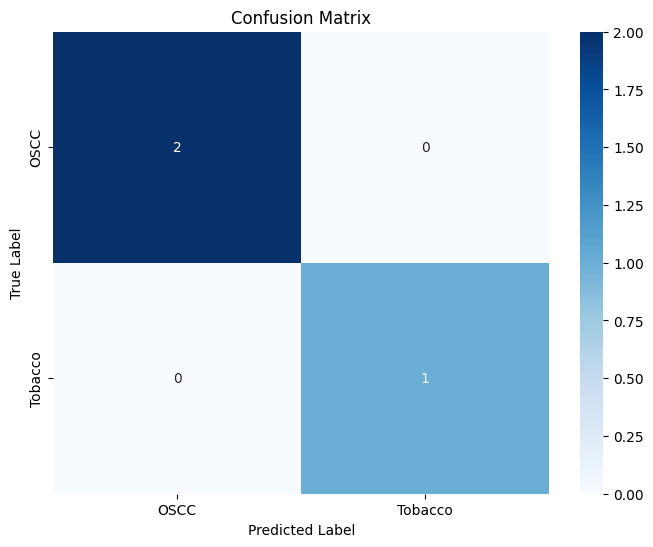

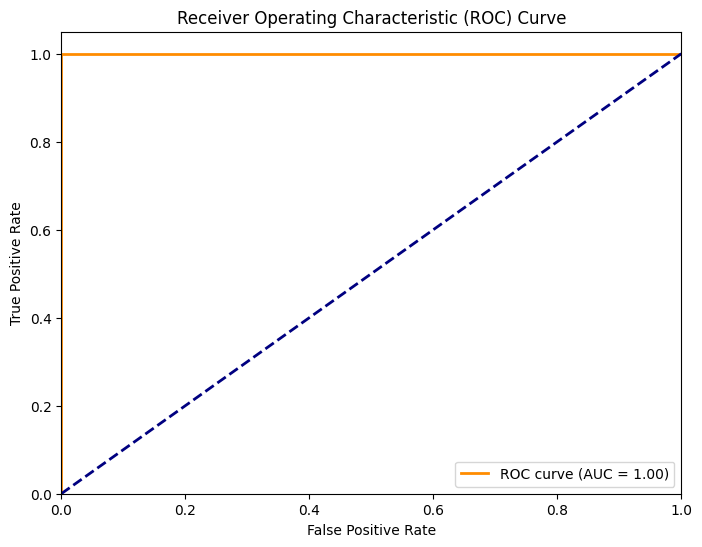

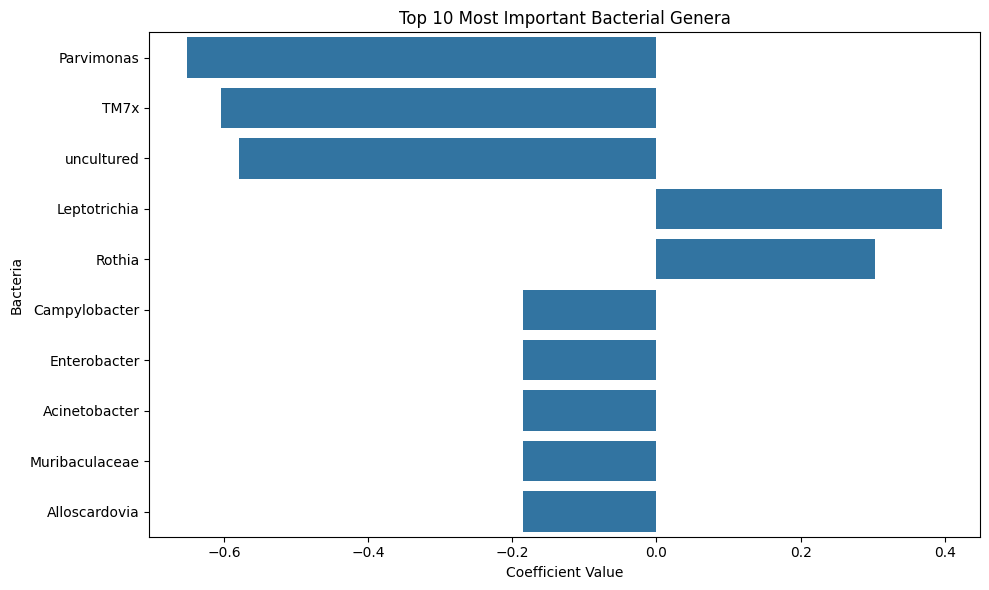


Cross-validation scores: [0.5 0.5 1.  0.5 0. ]
Mean CV accuracy: 0.500 (+/- 0.632)


/Users/dishajain/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv('level-6.csv')

# Filter for OSCC and Tobacco samples
df_filtered = df[df['isolate'].str.contains('cancer|Tobacco')]

# Get bacterial columns
bacteria_cols = [col for col in df.columns if 'g__' in col]
bacteria_cols = [col for col in bacteria_cols if not any(x in col for x in ['Streptococcus', 'Neisseria'])]

# Prepare features and target
X = df_filtered[bacteria_cols]
y = df_filtered['isolate'].apply(lambda x: 'OSCC' if 'cancer' in x else 'Tobacco')

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)[:,1]

# Calculate feature importance
importance = pd.DataFrame({
   'Bacteria': [col.split('g__')[1] for col in bacteria_cols],
   'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', ascending=False)

# Print results
print("\nLogistic Regression Results:")
print("\nModel Accuracy:", lr.score(X_test_scaled, y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['OSCC', 'Tobacco']))

print("\nTop Important Features:")
print(importance.head(10))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['OSCC', 'Tobacco'],
           yticklabels=['OSCC', 'Tobacco'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
importance['abs_coef'] = abs(importance['Coefficient'])
importance = importance.sort_values('abs_coef', ascending=False)
sns.barplot(data=importance.head(10), x='Coefficient', y='Bacteria')
plt.title('Top 10 Most Important Bacterial Genera')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Cross-validation
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")